# Laboratório 04: Identificação e Visualização de Dados Ausentes

**Disciplina:** Extração e Preparação de Dados (IBM8915)
**Professor:** Luís Aramis
**Objetivo:** Aplicar técnicas de diagnóstico para identificar, quantificar e visualizar "buracos" (valores nulos) em conjuntos de dados, além de integrar conceitos de análise exploratória e qualidade de dados.

In [1]:
# Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para os gráficos
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Ignorar avisos de depreciação para manter o notebook limpo
import warnings
warnings.filterwarnings('ignore')

## Parte 1: Exemplo Guiado - O "Raio-X" do Titanic

Neste exemplo, vamos carregar o clássico dataset do Titanic para entender como o Pandas lida com o "nada" (`NaN`) e como podemos usar a biblioteca Seaborn para visualizar a gravidade da ausência de dados.

--- Relatório de Completude ---
          Total Nulos  % de Ausência
Cabin             687      77.104377
Age               177      19.865320
Embarked            2       0.224467


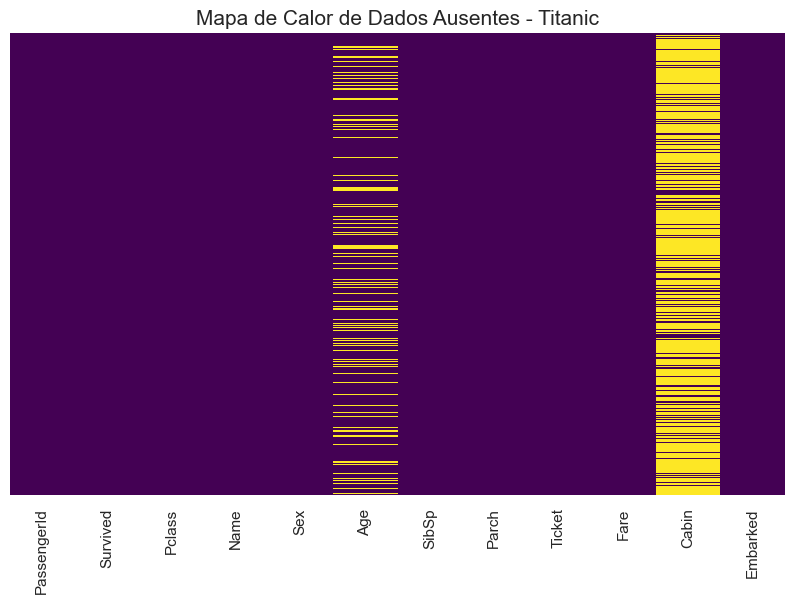

In [3]:
# 1. Carga dos dados (Usando a URL oficial para o dataset de treino)
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_exemplo = pd.read_csv(url_titanic)

# 2. Diagnóstico Rápido: Quantidade Absoluta e Percentual de Nulos
nulos_absolutos = df_exemplo.isnull().sum()
nulos_percentual = (df_exemplo.isnull().sum() / len(df_exemplo)) * 100

# Criando um DataFrame para exibir o relatório de forma elegante
relatorio_nulos = pd.DataFrame({
    'Total Nulos': nulos_absolutos,
    '% de Ausência': nulos_percentual
})
print("--- Relatório de Completude ---")
print(relatorio_nulos[relatorio_nulos['Total Nulos'] > 0].sort_values(by='% de Ausência', ascending=False))

# 3. Visualização (Mapa de Calor)
plt.figure(figsize=(10, 6))
# O sns.heatmap vai pintar de amarelo (ou outra cor) onde df.isnull() for True
sns.heatmap(df_exemplo.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor de Dados Ausentes - Titanic', fontsize=15)
plt.show()

## Parte 2: Exercício Prático (Mão na Massa)

Agora é a sua vez! Vamos simular um cenário onde você recebeu uma base de dados de avaliações de filmes (baseada no MovieLens), mas que sofreu corrupção durante a extração.

**Sua Tarefa:**

1. Execute a célula abaixo para gerar os dados simulados.
2. Escreva o código para descobrir **quantos** dados faltam em cada coluna.
3. Plote um gráfico de barras mostrando o _percentual_ de ausência de cada coluna.

In [ ]:
# NÃO ALTERE ESTE CÓDIGO - Geração de dados simulados com nulos plantados
np.random.seed(42)
dados_filmes = pd.DataFrame({
    'ID_Filme': range(1, 1001),
    'Titulo': ['Filme_' + str(i) for i in range(1, 1001)],
    'Orcamento': np.random.uniform(10, 200, 1000),
    'Avaliacao_Critica': np.random.uniform(1, 10, 1000),
    'Avaliacao_Publico': np.random.uniform(1, 10, 1000)
})
# Plantando os buracos (MCAR, MAR, MNAR)
dados_filmes.loc[np.random.choice(1000, 50, replace=False), 'Titulo'] = np.nan
dados_filmes.loc[np.random.choice(1000, 450, replace=False), 'Avaliacao_Critica'] = np.nan
dados_filmes.loc[dados_filmes['Orcamento'] < 50, 'Avaliacao_Publico'] = np.nan

In [ ]:
# ESCREVA SEU CÓDIGO AQUI
# Passo 1: Calcule a soma e o percentual de nulos do DataFrame `dados_filmes`


# Passo 2: Crie um gráfico (sugestão: gráfico de barras) que exiba o percentual de nulos de forma visual.


---

## Parte 3: Desafio para Casa - O Auditor de Dados (Avaliação Cumulativa)

Este desafio consolida todo o seu aprendizado desde a **Aula 02 até a Aula 06**.
Você trabalhará com um dataset hipotético de "Vendas de E-commerce Brasileiras" que contém vários problemas estruturais.

**Sua Missão Completa:**

1. **Carga e Encoding (Aula 02):** Execute a célula geradora de dados abaixo e salve-a como CSV no seu disco usando `to_csv(sep=';', encoding='latin-1')`. Em seguida, carregue esse arquivo de volta para um novo DataFrame simulando a extração do mundo real.
2. **Qualidade e Acurácia (Aula 05):** Verifique se existem linhas inteiras duplicadas no seu dataset. Se sim, contabilize-as e remova-as (`drop_duplicates`).
3. **Tipagem e Memória (Aula 04):** A coluna de `Status_Pedido` é um texto repetitivo. Converta-a para o tipo `category` para economizar memória. Comprove a alteração usando `.dtypes`.
4. **Mapeamento de Nulos (Aula 06):** Rastreie os valores ausentes no dataset limpo de duplicatas. Gere o `heatmap` com o Seaborn para visualizar o padrão dos buracos.
5. **Análise Exploratória (Aula 04):** Ignorando os valores nulos, faça um `groupby` para descobrir qual é o ticket médio (`Valor_Compra`) por `Status_Pedido`.

_Bom trabalho! Não esqueça de comitar seu notebook no GitHub ao finalizar._

In [ ]:
# NÃO ALTERE ESTE CÓDIGO - Geração de dados sujos
df_vendas = pd.DataFrame({
    'ID_Transacao': np.random.randint(1000, 5000, 800),
    'Status_Pedido': np.random.choice(['Entregue', 'Cancelado', 'Em Trânsito'], 800),
    'Valor_Compra': np.random.normal(150, 50, 800),
    'Idade_Cliente': np.random.randint(18, 75, 800),
    'CEP': [f"0{np.random.randint(10000, 99999)}-000" for _ in range(800)]
})

# Inserindo nulos
df_vendas.loc[np.random.choice(800, 150, replace=False), 'Idade_Cliente'] = np.nan
df_vendas.loc[df_vendas['Status_Pedido'] == 'Cancelado', 'Valor_Compra'] = np.nan # MNAR simulado

# Inserindo duplicatas
df_vendas = pd.concat([df_vendas, df_vendas.sample(45)], ignore_index=True)

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

# 1. Salvar como CSV e carregar novamente (lidando com sep e encoding)


# 2. Auditoria de duplicatas


# 3. Conversão de tipo (Category)


# 4. Heatmap de nulos


# 5. Groupby (Análise de negócio)


**Conclusão Final (Escreva aqui):**
Baseado no Heatmap e nos percentuais encontrados no desafio 3, responda:
Qual coluna parece ter um padrão de ausência do tipo _MNAR (Missing Not at Random)_ ou _MAR (Missing at Random)_? Justifique por que você acha que esses dados estão faltando e diga se você deletaria essa coluna inteira ou tentaria salvá-la na próxima aula.